# Med-AI & Data Visualization Project
###
#### Libraries: The following libraries are used:
    * pandas
    * numpy
    * matplotlib
    * scikit-learn
###
#### Sequence:

    0.

    - Import the required Libraries

    I.

    - Convert Data into pandas DataFrame
    - View Data
    - Prep Data for Visualization
    
    II.

    - Visualize the Data as a Histogram:
        - 1st: Use the .plot Method
        - 2nd: Use the Object Oriented Method
    - Visualize the Data as a Scatter Plot to show the connection between:
        - Cholesterol & Heart Disease
        - Max Heart Rate & Heart Disease
        
    III.

    - Adjust the Data so it can be used by a Machine Learning Algorithm:
    - Split the Data into Training and Test Datasets.
        - Choose features and lables
    - Train and Test an Enseble Algorithm from scikit on the prepped Data.
###
#### Data: A CSV-file that contains anonymized patient Data.

# 0.
    - Import the required Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# I. 
    - Convert Data into pandas DataFrame
    - View Data
    - Prep Data for Visualization

In [2]:
# import the anonymized patient data as a pandas df
# view the head of the df
anonymized_patient_data = pd.read_csv("anonymized-patient-data.csv")

In [5]:
# view the head of the df
anonymized_patient_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# grab the patients that are over 50
# name_var = df[df["column_name"] > value]
over_50 = anonymized_patient_data[anonymized_patient_data["age"] > 50]

In [13]:
# view the head of the over_50 df
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [15]:
# show length of the original df and the over_50 df
len(anonymized_patient_data), len(over_50)

(303, 208)

# II.
    - Visualize the Data as a Histogram:
        - 1st: Use the .plot Method
        - 2nd: Use the Object Oriented Method
    - Visualize the Data as a Scatter Plot to show the connection between:
        - Cholesterol & Heart Disease
        - Max Heart Rate & Heart Disease

# Histogram

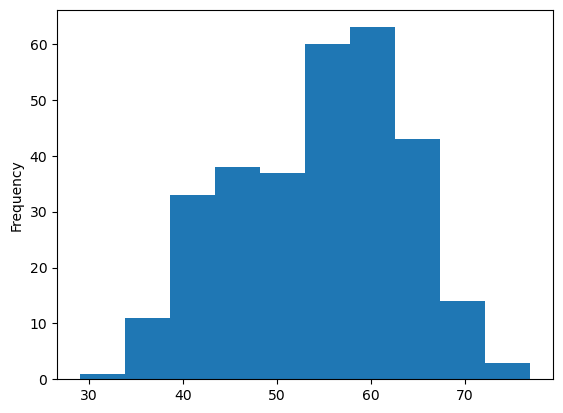

In [7]:
# plot a histogram of the df using the simple .plot method
# use age as the x-axis
anonymized_patient_data["age"].plot(kind="hist");

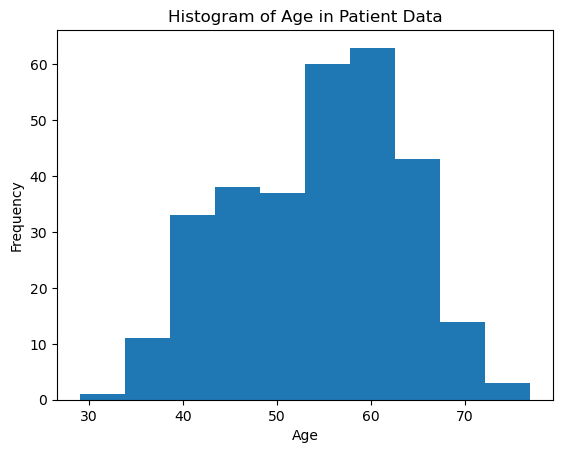

In [11]:
# plot the same histogram of the df as above using the object oriented method
# use the same axes

# create an empty plot
fig, ax = plt.subplots()

# plot the data
hist = ax.hist(anonymized_patient_data["age"])

# customize the plot
ax.set(title="Histogram of Age in Patient Data",
      xlabel="Age",
      ylabel="Frequency")

# show the plot
plt.show();

# Scatter Plot

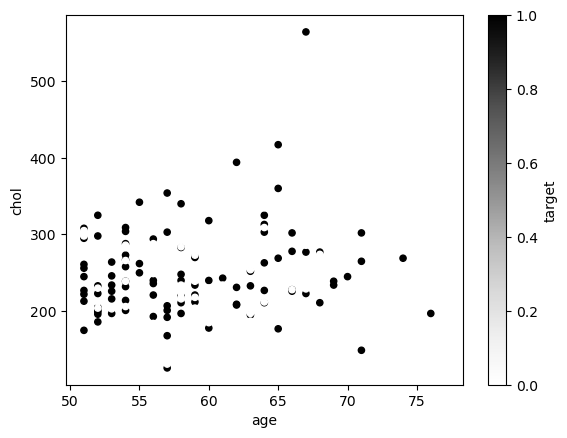

In [4]:
# plot the over_50 df as scatter
# x = age
# y = chol
# c for target

over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

(100.0, 600.0)

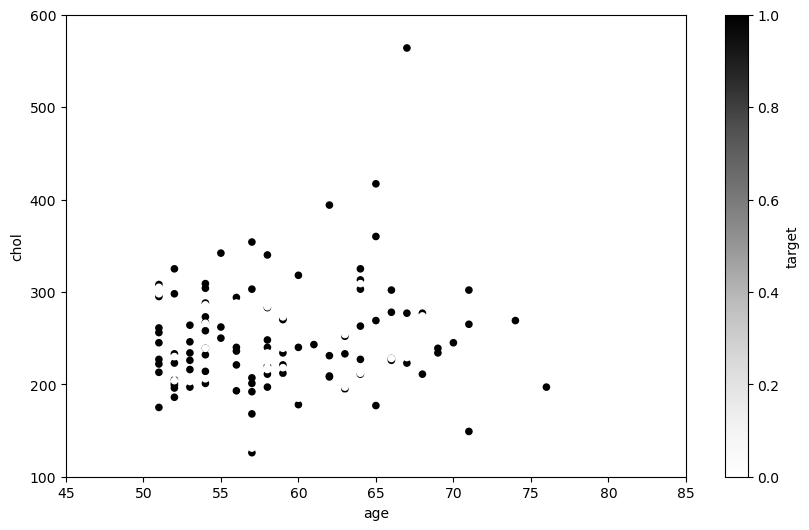

In [6]:
# use the object oriented method
# create a figure of 10 width and 6 height
# plot the df
# same names for axes

# plot the fig size
fig, ax = plt.subplots(figsize=(10, 6))

# customize the axes
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax)

# set the values of x-axis from 45 to 85
ax.set_xlim([45, 85])

# set the values of y-axis from 100 to 600
ax.set_ylim([100, 600])

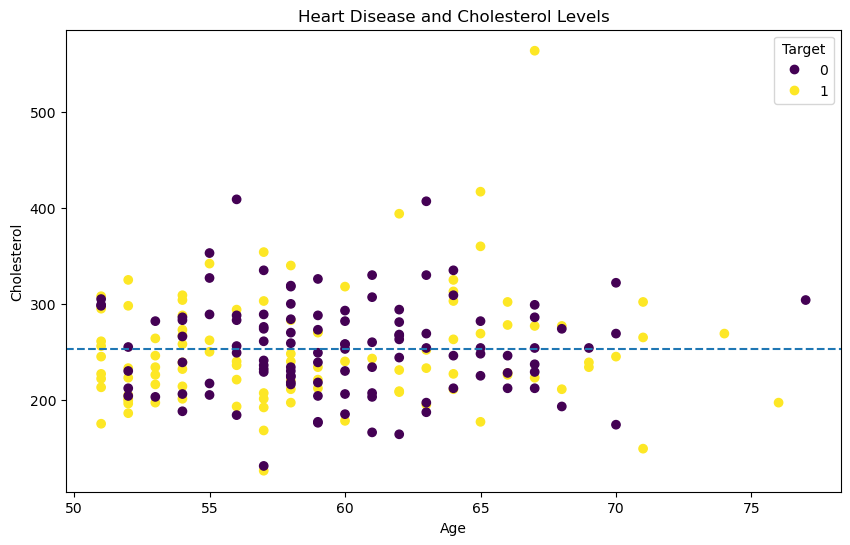

In [7]:
# let's customize the above plot
# add: x-axis-title, y-axis-title, heading
# add a legend for the target column
# add a horizontal median line for chol

# plot the fig size
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# add legend for target column
ax.legend(*scatter.legend_elements(), title="Target");

# add a horizontal line for chol
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

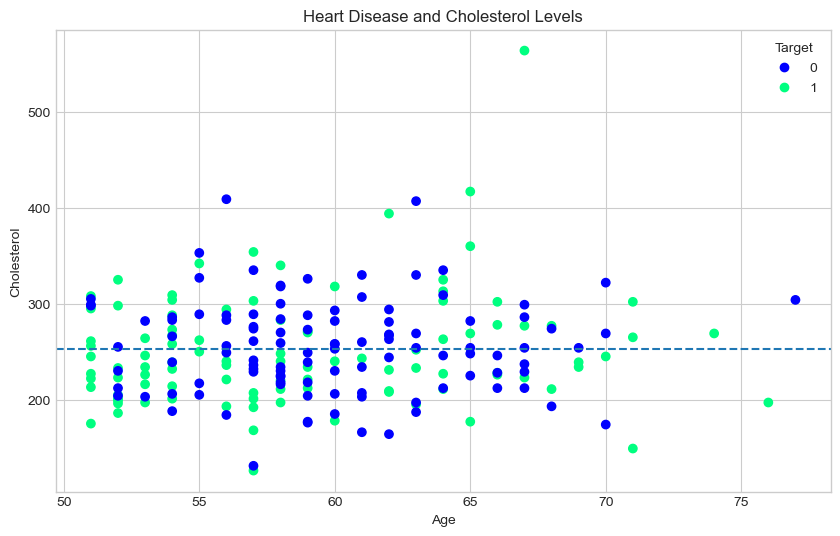

In [13]:
# make a scatter plot
# size 10, 6
# age x
# chol y
# heading
# axes description
# legend called "target" using target values
# mean of chol with horizontal line, style "--"
# add grid lines
# add color type winter

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.legend(*scatter.legend_elements(), title="Target")
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

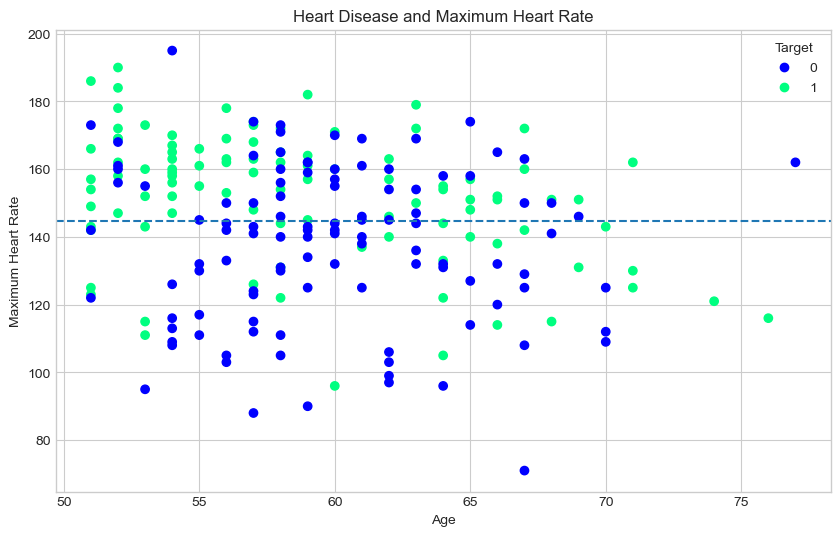

In [14]:
# make the same plot again but with thalach as y-axis

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")
ax.set(title="Heart Disease and Maximum Heart Rate",
       xlabel="Age",
       ylabel="Maximum Heart Rate")
ax.legend(*scatter.legend_elements(), title="Target")
ax.axhline(over_50["thalach"].mean(),
           linestyle="--");

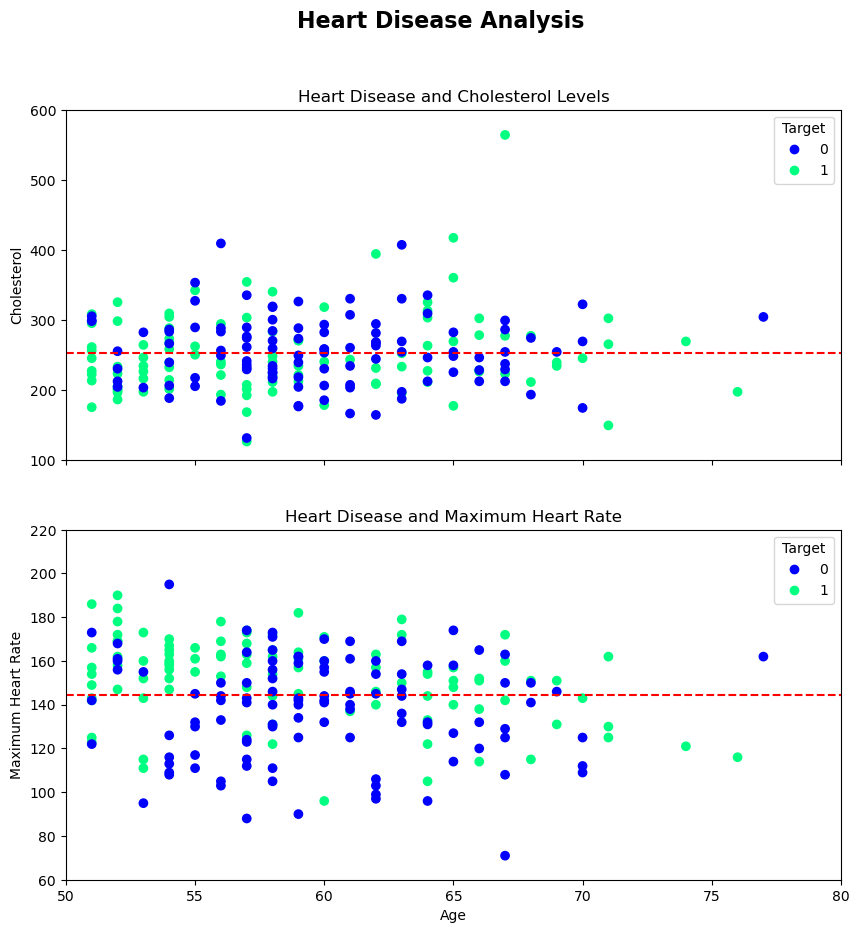

In [5]:
# make a figure where both of the plots above are in (one over the other)
# make them share the x-axis since it is the same data
# make the grid lines nice
# and add a title to the whole figure

# Canvas
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

# Heart Disease and Cholesterol
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.set_xlim([50, 80])
ax0.set_ylim([100, 600])
ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(over_50["chol"].mean(),
            linestyle="--", color="red")

# Heart Disease and Rate
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter")
ax1.set(title="Heart Disease and Maximum Heart Rate",
        xlabel="Age",
        ylabel="Maximum Heart Rate",
        ylim=[60, 220])
ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--", color="red");

In [18]:
# save the visualization
# fig.savefig("name-of-plot-with-code")
# default format is png
fig.savefig("anonymized-patient-data-analysis")

# III.
    - Adjust the Data so it can be used by a Machine Learning Algorithm:
    - Split the Data into Training and Test Datasets.
        - Choose features and lables
    - Train and Test an Enseble Algorithm from scikit on the prepped Data.

# Adjust the Data so it can be used by a Machine Learning Algorithm

In [5]:
# import the anonymized patient data as a pandas df
# view the head of the df
anonymized_patient_data = pd.read_csv("anonymized-patient-data.csv")

In [4]:
anonymized_patient_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# make sure the data is all numerical
# (in this case, the data is all numerical, we don't have to adjust the data types)
anonymized_patient_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Split the Data into Training and Test Datasets.
###    - Choose features and lables (usually named X and y)

In [8]:
# let's classify the data into X and y
# X is everything but "target", y is "target"
# X, or everything but the "target" column is also called the "features matrix"

# we have to drop the target column from our dataframe, axis=1 indicates the column-titles
X = anonymized_patient_data.drop("target", axis=1)

# let's view the new dataframe "X" (there should be no column named "target" anymore)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
# now we can classify the "target" column as y
# y consists only of the "target" column
# y can be referred to as the "lable"

# we can just pick the desired column from our dataframe and assign it to y
y = anonymized_patient_data["target"]

# view the head (there should be nothing but the "target" column)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# we can now perform a split on the prepped data
#   - this is needed so the machine learning algorithm can train on some of the data
#   - in this case, we'll split the data 80-20, 80% training data, 20% test data

# let's check the length and shape of X and y
# the length should equal all of the data entries
# the shape of X should show all the colums it contains, in this case 13
# we know y consists of only the one "target" column
len(X), len(y), X.shape, y.shape

(303, 303, (303, 13), (303,))

# Here comes the Split

In [10]:
# import the "train_test_split" method from the sklearn library
from sklearn.model_selection import train_test_split

# split the data, 80-20 for each X and y
# test_size=0.2 equals 20% on the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# the length of the training data should be 80% now and 20% for the test data, let's check
length_train = 303 * 0.8
length_test = 303 * 0.2
print("length train dataset: ",round(length_train))
print("length test dataset: ",round(length_test))

# check the shapes, length should change but column-wise everything stays the same
X_train.shape, y_train.shape, X_test.shape, y_test.shape

length train dataset:  242
length test dataset:  61


((242, 13), (242,), (61, 13), (61,))

# Train and Test an Enseble Algorithm from scikit on the prepped Data.
-  let's choose a machine learning algorithm from the scikit ensemble
-  there are many different machine learning algorithms
-  we need to choose the right one but to do that we have to know what the problem is that we try to solve

- A Simple Problem Definition:
    - on the data that we provide, predict the lable (target variable)

- for more information about different machine learning algorithms visit https://scikit-learn.org/stable/

In [13]:
# we choose the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# can be stored in a variable
clf = RandomForestClassifier()

# Train the Model

In [117]:
# now we let the Machine Learning algorithm find patterns in the training data
clf.fit(X_train, y_train);

# the accuracy should be 1.0, or 100%
# that's because the machine learning algorithm can see the features matrix and corresponding lables
clf.score(X_train, y_train)

1.0

# Test the Model

In [118]:
# the model is now trained and we can run our test datasets on it
# it should be able to predict the target values from the patterns it learned
# if this prediction is 1.0, there is probably something wrong with the data you provided
#   - that means the machine probably has already seen the lables that it tries to predict
# this score should most likely be below a perfect 1.0
acc = clf.score(X_test, y_test)
print("The accuracy is at",round((100*acc), 2),"%")

The accuracy is at 85.25 %


# Tweak the Hyperparameters

In [72]:
# the model has a ~85% accuracy in predicting the target variable correctly
# let's tweak the hyperparameters and see if we can get a higher accuracy
# view the hyperparams
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
# we will try a different amount of n_estimators (just one of the many hyperparameters)

# use a random.seed for the data to be split the same for every run
np.random.seed(42)

# make a for loop that increases the n_estimators by 20, start from 20 up to 200
for i in range(20, 210, 20):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 100 estimators...
Model accuracy on test set: 88.52%

Trying model with 120 estimators...
Model accuracy on test set: 83.61%

Trying model with 140 estimators...
Model accuracy on test set: 85.25%

Trying model with 160 estimators...
Model accuracy on test set: 81.97%

Trying model with 180 estimators...
Model accuracy on test set: 83.61%

Trying model with 200 estimators...
Model accuracy on test set: 83.61%



# What is the Machine Learning Model actually predicting

In [12]:
# let's make the predictions reproducable by using a random seed
np.random.seed(5)

# get the machine learning algorithm from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# get the data
anonymized_patient_data = pd.read_csv("anonymized-patient-data.csv")

# prep the data into features and lables
X = anonymized_patient_data.drop("target", axis=1)
y = anonymized_patient_data["target"]

# get the "train_test_split" method from the sklearn library and perform a split on the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf.fit(X_train, y_train);
seen = clf.score(X_train, y_train)

# test the model
unseen = clf.score(X_test, y_test)

# show results
print(f"Train Data Accuracy: {seen*100}%")
print(f"Test Data Accuracy: {round(unseen*100, 2)}%")

# view the predicted target values
# this is the data that the machine learning algorithm predicted
# we can compare the data to the original and see which predictions are incorrect
y_preds = clf.predict(X_test)
y_preds

Train Data Accuracy: 100.0%
Test Data Accuracy: 88.52%


array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
# turn the predictions data into a dataframe
machine_pred = pd.DataFrame({"machine prediction": y_preds})
# turn the actual data into a dataframe
actual_data = pd.DataFrame({"actual data": y_test})

# we should now have two dataframes with 61 rows (heading included) and each with one column
# there is an index indicating which datasets were choosen by the split (with the random seed of 5)
# and also the machine prediction data is indexed (but we need the index of the actual data)
# we will merge the dataframes on the actual data index and ignore the machine pred index
print(machine_pred, actual_data)

    machine prediction
0                    1
1                    0
2                    0
3                    0
4                    1
..                 ...
56                   1
57                   0
58                   1
59                   1
60                   0

[61 rows x 1 columns]      actual data
302            0
243            0
268            0
213            0
24             1
..           ...
25             1
259            0
196            0
149            1
212            0

[61 rows x 1 columns]


In [14]:
# set the index of the machine prediction dataframe
machine_pred = machine_pred.set_index(actual_data.index)

# merge the dataframes
merged = pd.concat([actual_data, machine_pred], axis=1)
print(merged)

     actual data  machine prediction
302            0                   1
243            0                   0
268            0                   0
213            0                   0
24             1                   1
..           ...                 ...
25             1                   1
259            0                   0
196            0                   1
149            1                   1
212            0                   0

[61 rows x 2 columns]


In [15]:
# let's sort the data for better readability
merged_sorted = merged.sort_index()
print(merged_sorted)

     actual data  machine prediction
21             1                   1
24             1                   1
25             1                   1
33             1                   1
39             1                   1
..           ...                 ...
272            0                   1
284            0                   0
289            0                   0
295            0                   0
302            0                   1

[61 rows x 2 columns]


In [16]:
# the machine learning algorithm we used has an accuracy of 88.52% on this data
# we can do a simple check to see if that's correct

# first we have to find the correct & incorrect predictions
negative_predictions = merged_sorted[merged_sorted["actual data"] != merged_sorted["machine prediction"]]
positive_predictions = merged_sorted[merged_sorted["actual data"] == merged_sorted["machine prediction"]]

# now we can calculate the percentage of the positive predictions, this should be 88.52%
print("Accuracy check: ", round((len(positive_predictions * 100) / 61) * 100, 2),"%")

print("Total amount of data sets: ", len(y_test))
print("Good predictions: ", len(positive_predictions))
print("Bad predictions: ", len(negative_predictions))

Accuracy check:  88.52 %
Total amount of data sets:  61
Good predictions:  54
Bad predictions:  7


In [146]:
# Some pandas options for dataframe visibility

# show all rows
pd.set_option("display.max_rows", None)

# reset to standard
# pd.reset_option("display.max_rows")

# here we can see the whole dataframe
print(merged_sorted)

     actual data  machine prediction
21             1                   1
24             1                   1
25             1                   1
33             1                   1
39             1                   1
42             1                   0
43             1                   1
48             1                   1
49             1                   1
50             1                   1
56             1                   1
60             1                   1
61             1                   1
62             1                   1
66             1                   1
84             1                   1
88             1                   1
90             1                   1
93             1                   1
95             1                   0
96             1                   1
98             1                   1
115            1                   1
117            1                   1
127            1                   1
132            1                   1
1